In [2]:
pip install catboost

     |████████████████████████████████| 67.4 MB 26 kB/s 


In [3]:
pip install shap

     |████████████████████████████████| 356 kB 13.8 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491631 sha256=6e8e74f7c88db3af5c6f05b861eb63136b292d733bfb16e2bfd9d6d2bd83d47d
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve

In [5]:
dev_file_path = 'https://raw.githubusercontent.com/darnellkikoo/AlgoBC_FProject/main/assets/dev_afterpreprocess.csv'
test_file_path = 'https://raw.githubusercontent.com/darnellkikoo/AlgoBC_FProject/main/assets/test_afterpreprocess.csv'

In [6]:
dev = pd.read_csv(dev_file_path)
unseen = pd.read_csv(test_file_path)

In [7]:
dev.shape

(295972, 10)

In [8]:
unseen.shape

(74034, 10)

In [9]:
dev.drop('id', axis = 1, inplace = True)
unseen.drop('id', axis = 1, inplace = True)

In [10]:
dev.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,295972.0,0.286170,0.236756,0.0,0.076923,0.246154,0.446154,1.0
Previously_Insured,295972.0,0.459658,0.498371,0.0,0.000000,0.000000,1.000000,1.0
Vehicle_Age,295972.0,0.301794,0.282951,0.0,0.000000,0.500000,0.500000,1.0
Vehicle_Damage,295972.0,0.503385,0.499989,0.0,0.000000,1.000000,1.000000,1.0
Annual_Premium,295972.0,0.449585,0.248774,0.0,0.362562,0.484395,0.606972,1.0
Vintage,295972.0,0.499514,0.289591,0.0,0.249135,0.498270,0.750865,1.0
Response,295972.0,0.121927,0.327202,0.0,0.000000,0.000000,0.000000,1.0
0,295972.0,0.460067,0.498404,0.0,0.000000,0.000000,1.000000,1.0
1,295972.0,0.539933,0.498404,0.0,0.000000,1.000000,1.000000,1.0


In [11]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295972 entries, 0 to 295971
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 295972 non-null  float64
 1   Previously_Insured  295972 non-null  int64  
 2   Vehicle_Age         295972 non-null  float64
 3   Vehicle_Damage      295972 non-null  float64
 4   Annual_Premium      295972 non-null  float64
 5   Vintage             295972 non-null  float64
 6   Response            295972 non-null  int64  
 7   0                   295972 non-null  float64
 8   1                   295972 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 20.3 MB


In [12]:
dev.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,0,1
0,0.415385,0,0.5,1.0,0.526802,0.560554,0,0.0,1.0
1,0.384615,0,0.5,1.0,0.000000,0.024221,0,0.0,1.0
2,0.046154,1,0.0,0.0,0.541090,0.401384,0,0.0,1.0
3,0.046154,1,0.0,0.0,0.460329,0.197232,0,0.0,1.0
4,0.292308,0,0.5,1.0,0.557421,0.020761,0,1.0,0.0


In [13]:
unseen.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,74034.0,0.287206,0.237636,0.0,0.076923,0.246154,0.446154,1.0
Previously_Insured,74034.0,0.461288,0.498502,0.0,0.000000,0.000000,1.000000,1.0
Vehicle_Age,74034.0,0.302489,0.282736,0.0,0.000000,0.500000,0.500000,1.0
Vehicle_Damage,74034.0,0.500338,0.500003,0.0,0.000000,1.000000,1.000000,1.0
Annual_Premium,74034.0,0.449153,0.248927,0.0,0.361926,0.483616,0.606954,1.0
Vintage,74034.0,0.499202,0.289252,0.0,0.249135,0.498270,0.750865,1.0
Response,74034.0,0.121917,0.327192,0.0,0.000000,0.000000,0.000000,1.0
0,74034.0,0.460491,0.498440,0.0,0.000000,0.000000,1.000000,1.0
1,74034.0,0.539509,0.498440,0.0,0.000000,1.000000,1.000000,1.0


In [14]:
unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74034 entries, 0 to 74033
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 74034 non-null  float64
 1   Previously_Insured  74034 non-null  int64  
 2   Vehicle_Age         74034 non-null  float64
 3   Vehicle_Damage      74034 non-null  float64
 4   Annual_Premium      74034 non-null  float64
 5   Vintage             74034 non-null  float64
 6   Response            74034 non-null  int64  
 7   0                   74034 non-null  float64
 8   1                   74034 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 5.1 MB


In [15]:
unseen.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,0,1
0,0.046154,1,0.0,0.0,0.766160,0.726644,0,1.0,0.0
1,0.615385,0,0.5,1.0,0.532102,0.833910,1,1.0,0.0
2,0.276923,1,0.5,0.0,0.649013,0.228374,0,1.0,0.0
3,0.061538,1,0.0,1.0,0.695838,0.536332,0,0.0,1.0
4,0.184615,0,0.0,0.0,0.464139,0.311419,0,1.0,0.0


# Evaluate Baseline Model

When we evaluate a model's performance, it is important to have a baseline model, to see how much improvement we can make from other models. With a baseline model, we can also set a baseline score as the standard checking score. Experimenting with a baseline model is quite cheap in cost and time, as we would use simple algorithm model as our baseline

In [19]:
X = dev.drop('Response', axis = 1)
y = dev['Response']

In [20]:
X.shape

(295972, 8)

In [21]:
def evaluate_baseline(model):
     scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
     scores = scores.mean()
     return scores
     

In [ ]:
#No normalization with Annual_Premium outlier removal

logisticModel = LogisticRegression()
logisticModelScore = evaluate_baseline(logisticModel)
print("Baseline LogisticRegression Model ROC-AUC Score: " + str(logisticModelScore))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Baseline LogisticRegression Model ROC-AUC Score: 0.6712248106072092


In [22]:
#Normalization with Annual_Premium outlier removal

logisticModel = LogisticRegression()
logisticModelScore = evaluate_baseline(logisticModel)
print("Baseline LogisticRegression Model ROC-AUC Score: " + str(logisticModelScore))

Baseline LogisticRegression Model ROC-AUC Score: 0.8305344294005266


# Split data for development dataset and evaluation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 19)

In [16]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "LDA" : LinearDiscriminantAnalysis(), 
    "SGD" : SGDClassifier(),
    "Gaussian": GaussianNB(),
    "Random Forest" : RandomForestClassifier(), 
    "Gradient Boosting" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier(),
    "CatBoost" : CatBoostClassifier(),
    "LGBM" : LGBMClassifier(),
    "KNN" : KNeighborsClassifier(n_neighbors=3)
        }

In [25]:
scores = []
probability = {}
for model in models:
  print("Model "+model + " score:")
  classifier = models[model]
  classifier.fit(X_train, y_train)
  predicts = classifier.predict(X_test)
  try:
    score = classifier.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, score, average='weighted')
    probability[model] = score
  except:
    roc = 0

  scores.append([
                 model,
                 accuracy_score(y_test, predicts),
                 f1_score(y_test, predicts, average ='weighted'),
                 precision_score(y_test, predicts, average = 'weighted', zero_division = 1),
                 recall_score(y_test, predicts, average= 'weighted'),
                 roc
  ])

  print("Accuracy score : ", accuracy_score(y_test, predicts))
  print("F1 score : ", f1_score(y_test, predicts, average = 'weighted'))
  print("Precision score : ", precision_score(y_test, predicts, average = 'weighted', zero_division = 1))
  print("Recall score : ", recall_score(y_test, predicts, average = 'weighted'))
  print("ROC score : ", roc)
  print()


Model Logistic Regression score:
Accuracy score :  0.878013345721767
F1 score :  0.8210450338480333
Precision score :  0.7710188657722629
Recall score :  0.878013345721767
ROC score :  0.8299017459305709

Model Decision Tree score:
Accuracy score :  0.8220457808936565
F1 score :  0.8229667516614396
Precision score :  0.8239021341501664
Recall score :  0.8220457808936565
ROC score :  0.5959750931279678

Model LDA score:
Accuracy score :  0.8758003209730552
F1 score :  0.825152274543422
Precision score :  0.8163364339122435
Recall score :  0.8758003209730552
ROC score :  0.8289573199750636

Model SGD score:
Accuracy score :  0.8780809189965368
F1 score :  0.8210786793124588
Precision score :  0.8929451813092658
Recall score :  0.8780809189965368
ROC score :  0

Model Gaussian score:
Accuracy score :  0.6397161922459668
F1 score :  0.7008953205594486
Precision score :  0.9034551847267094
Recall score :  0.6397161922459668
ROC score :  0.8214104081606073

Model Random Forest score:
Accurac

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.10636
0:	learn: 0.5207319	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.4224050	total: 129ms	remaining: 1m 4s
2:	learn: 0.3679691	total: 197ms	remaining: 1m 5s
3:	learn: 0.3362036	total: 260ms	remaining: 1m 4s
4:	learn: 0.3166347	total: 322ms	remaining: 1m 4s
5:	learn: 0.3040315	total: 384ms	remaining: 1m 3s
6:	learn: 0.2952674	total: 448ms	remaining: 1m 3s
7:	learn: 0.2890309	total: 512ms	remaining: 1m 3s
8:	learn: 0.2849325	total: 575ms	remaining: 1m 3s
9:	learn: 0.2822863	total: 638ms	remaining: 1m 3s
10:	learn: 0.2797538	total: 706ms	remaining: 1m 3s
11:	learn: 0.2777852	total: 770ms	remaining: 1m 3s
12:	learn: 0.2760077	total: 836ms	remaining: 1m 3s
13:	learn: 0.2748393	total: 899ms	remaining: 1m 3s
14:	learn: 0.2739160	total: 969ms	remaining: 1m 3s
15:	learn: 0.2730110	total: 1.03s	remaining: 1m 3s
16:	learn: 0.2723579	total: 1.09s	remaining: 1m 3s
17:	learn: 0.2717665	total: 1.15s	remaining: 1m 3s
18:	learn: 0.2713719	total: 1.22s	remaining: 1m 2s
19:	learn: 

In [26]:
b = pd.DataFrame(scores)
b = b.rename({0:'Model', 1: 'Accuracy', 2: 'F1', 3: 'Precision', 4: 'Recall', 5: 'ROC'}, axis = 1)
b = b.sort_values('ROC', ascending=False).reset_index(). drop('index', axis = 1)
b

,Model,Accuracy,F1,Precision,Recall,ROC
0,XGBoost,0.878081,0.821079,0.892945,0.878081,0.846362
1,Gradient Boosting,0.878081,0.821079,0.892945,0.878081,0.846156
2,LGBM,0.878115,0.821455,0.838209,0.878115,0.846132
3,CatBoost,0.877405,0.822915,0.818824,0.877405,0.842939
4,Logistic Regression,0.878013,0.821045,0.771019,0.878013,0.829902
5,LDA,0.875800,0.825152,0.816336,0.875800,0.828957
6,Gaussian,0.639716,0.700895,0.903455,0.639716,0.821410
7,Random Forest,0.854312,0.832645,0.818916,0.854312,0.810628
8,KNN,0.844852,0.831341,0.820965,0.844852,0.693938
9,Decision Tree,0.822046,0.822967,0.823902,0.822046,0.595975


# Model Evaluation

We will take the dataset after outlier removal and decided to use XGBoost, as it gets the highest score for ROC, Recall and Accuracy

## Parameter Tuning

Parameter tuning is useful tu boost our model into getting a better performance. Hence, we tune the model based on the reccomendation from GridSearchCV, a library used to determine better hyperparameter for parameter tunings.

In [ ]:
params = {
    'n_estimators' : [1000, 1500, 2000],
    'max_depth' :[4, 6, 7],
    'reg_alpha': [ 0.5, 1, 1.5],  
    'reg_lambda':[0.9, 1.5, 2],
    'learning_rate': [0.01, 0.5, 0.1],
    'col_sample_bytree': [0.7, 0.9, 1.5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
final_model = XGBClassifier(n_jobs = 4)
gs = GridSearchCV(
    final_model, params,
    scoring='roc_auc',
    cv=3,
    verbose=True)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 70.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=4,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 7],
                         'n_estimators': [1000, 1500, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [ ]:
# {'max_depth': 5, 'n_estimators': 1000}
# {'reg_alpha': 0.5, 'reg_lambda': 0.9}
# {'col_sample_bytree': 0.7, 'learning_rate': 0.1}
print(gs.best_params_)

{'max_depth': 4, 'n_estimators': 1000}


Now we can start tuning the model and train it

In [27]:
new_XGB = XGBClassifier(
    max_depth = 4,
    n_estimators = 1000,
    reg_alpha = 0.5,
    reg_lambda = 0.9,
    learning_rate = 0.01,
    n_jobs = 3
)

In [28]:
new_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=3,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=0.9, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
def printScore(model):
  score = model.predict_proba(X_test)[:, 1]
  pred = model.predict(X_test)
  roc = roc_auc_score(y_test, score, average = 'weighted')
  print("Accuracy score : ", accuracy_score(y_test, pred))
  print("F1 score : ", f1_score(y_test, pred, average = 'weighted'))
  print("Precision score : ", precision_score(y_test, pred, average = 'weighted', zero_division=1))
  print("Recall score : ", recall_score(y_test, pred, average = 'weighted',zero_division=1))
  print("ROC score : ", roc)
  print(classification_report(pred, y_test))  

In [30]:
printScore(new_XGB) #First try

Accuracy score :  0.8780809189965368
F1 score :  0.8210786793124588
Precision score :  0.8929451813092658
Recall score :  0.8780809189965368
ROC score :  0.8467748807167663
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     59195
           1       0.00      0.00      0.00         0

    accuracy                           0.88     59195
   macro avg       0.50      0.44      0.47     59195
weighted avg       1.00      0.88      0.94     59195



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision, recall and f1-score for "1" in Response showed that there are 0 prediction that predicted "1". This is caused by the default treshold which is 0.5. We will later use ROC_AUC as the new treshold to increase the True Positive Rate

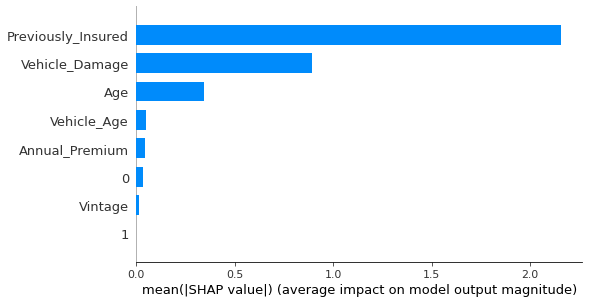

In [31]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(new_XGB)

shap_values = shap.TreeExplainer(new_XGB).shap_values(X_test)

#plot shap_summary
shap.summary_plot(shap_values, X_train, plot_type="bar")

The mean barplot SHAP value showed that Previously_Insured and Vehicle_Damage have the biggest impact in determining response

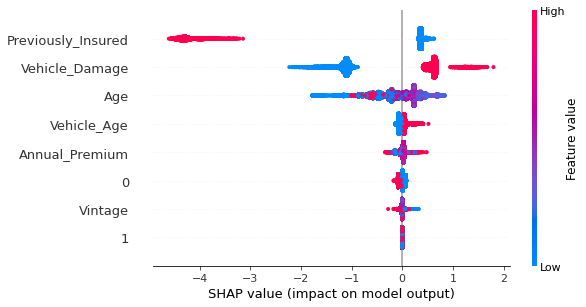

In [32]:
plt.figure(figsize = (10,10))
shap.summary_plot(shap_values, X_test)

It is also explained from feature importance this chart that both Previously_Insured and Vehicle_Age was the most important feature

# Predicting on Unseen Datasets

Now is the real challenge, we gonna use our model to predict the unseen datasets that we have preprocessed before

In [33]:
X_unseen = unseen.drop('Response', axis = 1)
y_unseen = unseen['Response']

In [34]:
X_train.shape

(236777, 8)

In [35]:
X_unseen.shape

(74034, 8)

In [36]:
y_unseen.shape

(74034,)

In [37]:
def predictUnseenValues(model, X_unseen, y_unseen):
  score = model.predict_proba(X_unseen)[:, 1]
  pred = model.predict(X_unseen)
  roc = roc_auc_score(y_unseen, score, average = 'weighted')
  print("Accuracy score : ", accuracy_score(y_unseen, pred))
  print("F1 score : ", f1_score(y_unseen, pred, average = 'weighted'))
  print("Precision score : ", precision_score(y_unseen, pred, average = 'weighted', zero_division = 1))
  print("Recall score : ", recall_score(y_unseen, pred, average = 'weighted', zero_division = 1))
  print("ROC score : ", roc)
  return score, pred, roc

In [38]:
final_score, final_pred, final_roc = predictUnseenValues(new_XGB, X_unseen, y_unseen)

Accuracy score :  0.8780830429262231
F1 score :  0.8210817228542153
Precision score :  0.8929467873483522
Recall score :  0.8780830429262231
ROC score :  0.8482817855576683


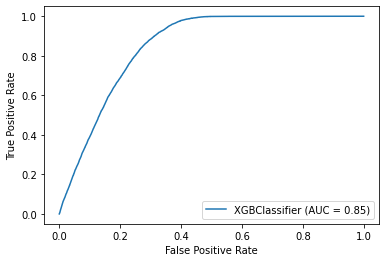

In [39]:
from sklearn import metrics
metrics.plot_roc_curve(new_XGB, X_unseen, y_unseen)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_unseen, final_pred, labels =[0, 1])

array([[65008,     0],
       [ 9026,     0]])

In [43]:
result = []
for i in final_score:
  if i > 0.15:
    result.append(1)
  else:
    result.append(0)

In [45]:
confusion_matrix(y_unseen, result)

array([[45300, 19708],
       [ 1015,  8011]])

In [44]:
Predicted1 = 8011+19708
Predicted0 = 1015+45300
Total = len(result)
SavedTarget = (Total-Predicted1) / Total * 100
print("The amount of expenses saved using machine learning: " + str(round(SavedTarget,2)) + "%")

The amount of expenses saved using machine learning: 62.56%


In [46]:
print(classification_report(y_unseen, result, labels=[0,1], zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.70      0.81     65008
           1       0.29      0.89      0.44      9026

    accuracy                           0.72     74034
   macro avg       0.63      0.79      0.62     74034
weighted avg       0.89      0.72      0.77     74034



# Downloading model weight (pickle)

In [49]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(new_XGB, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

Downloading the file in .sav

In [50]:
from google.colab import files
files.download('finalized_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading the model in .pkl

In [53]:
from sklearn.externals import joblib
joblib.dump(new_XGB, "finalized_model.pkl")

['finalized_model.pkl']

In [54]:
files.download('finalized_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>